# ESE102 Problem Set 1 Question 3
##### Scott Conn, Sara Taylor and Andy Thompson
---

This notebook provides the code to complete Q3 on the problem set. Please read the question in the problem set in detail before beginning the notebook.

In [10]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In the problem we are going to make use of the xarray python package to look at some observations of geostrophically balanced flow. The xarray package is a commonly used package for manipulating oceanographic data. 

To begin, we open the data file with xarray. We can look at the metadata of the file. For this particular example we see that the file contains one snapshot in time with 17 grid points in the north/south direction and 49 in the east/west direction.

Under the "Data Variables" heading we can see all of the variables that are stored in the file. You can click on the icon to the right that looks like a piece of paper in order to see a description of each variable.

For this problem we are going to be interested in the "sla" variable. This stands for sea level anomaly and is like the SSH we have discussed in class.

In [17]:
ds = xr.open_dataset('SSH_July16.nc')
ds

<xarray.Dataset>
Dimensions:    (time: 1, latitude: 17, longitude: 49)
Coordinates:
  * time       (time) datetime64[ns] 2019-07-16
  * latitude   (latitude) float32 -53.88 -53.62 -53.38 ... -50.38 -50.12 -49.88
  * longitude  (longitude) float32 29.12 29.38 29.62 29.88 ... 40.62 40.88 41.12
Data variables:
    adt        (time, latitude, longitude) float64 ...
    ugos       (time, latitude, longitude) float64 ...
    vgos       (time, latitude, longitude) float64 ...
    vgosa      (time, latitude, longitude) float64 ...
    err        (time, latitude, longitude) float64 ...
    sla        (time, latitude, longitude) float64 ...
    ugosa      (time, latitude, longitude) float64 ...
Attributes: (12/46)
    _NCProperties:                   version=1|netcdflibversion=4.4.1.1|hdf5l...
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Sea Surface Height measured by Altimetry...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    ...                              ...
    time_coverage_duration:          P1D
    time_coverage_end:               2019-07-16T00:00:00Z
    time_coverage_resolution:        P1D
    time_coverage_start:             2019-07-16T00:00:00Z
    title:                           NRT merged all satellites Global Ocean G...
    History:                         Translated to CF-1.0 Conventions by Netc...

In [52]:
lat = ds.latitude.values
lon = ds.longitude.values
h = ds.sla.values[0,:,:]

Let's begin by taking a look at the sla. The xarray package has built in methods to plot the data that you can check out if you are interested (link). Here we'll just stick with usual pyplot plotting.

# Q3b

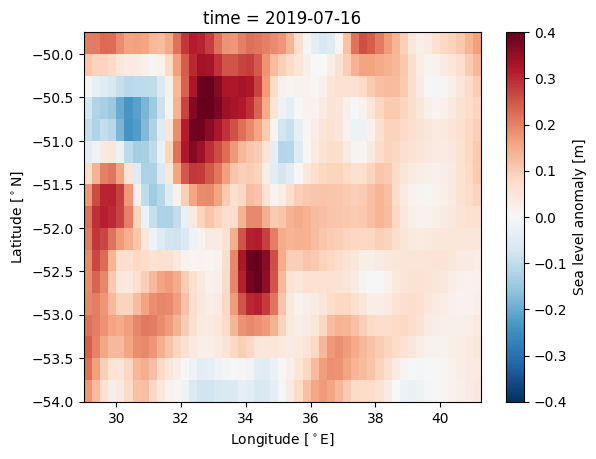

In [60]:
plt.pcolormesh(lon,lat,h,vmin=-0.4,vmax=0.4,cmap='RdBu_r')
plt.colorbar(label="Sea level anomaly [m]")
plt.xlabel("Longitude [$^\circ$E]")
plt.ylabel("Latitude [$^\circ$N]")
plt.title("time = 2019-07-16");

Next we will try to calculate the geostrophic flow that corresponds to this SSH field. **Fill in the lines below to calculate u and v given the SSH field above.** You should have written the geostrophic balance relationship in part a).

To take a derivative of discrete data there are various possible methods. For this problem use centered finite differences. For a function $f(x)$ that we have sampled at discrete points ${x^i}$, the derivative can be approximated as:

$$
\left.\frac{df}{dx}\right\vert^i = \frac{f(x^{i+1})-f(x^{i-1})}{2\Delta x}
$$

Note that by using this method we will not be able to calculate the derivative at the first grid point in either direction (i.e. the derivative data will be $15\times47$).

In [35]:
g = 10           #graviational acceleration [m2/s]
f = -1e-4        #Coriolis frequency [/s]
dx = 17100       #x-grid spacing [m]
dy = 27780       #y-grid spacing [m]

#ADD CODE HERE
#u = 
#v = 

In [43]:
u = ds.ugos.values[0,1:-1,1:-1]
v = ds.vgos.values[0,1:-1,1:-1]

Now let's add the velocity vectors to the SSH plot.

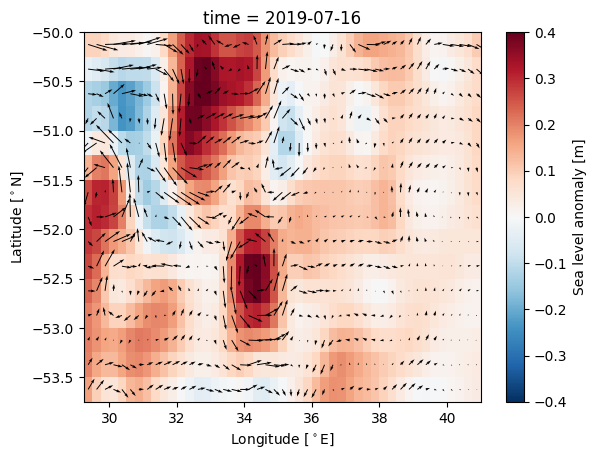

In [62]:
plt.pcolormesh(lon[1:-1],lat[1:-1],h[1:-1,1:-1],vmin=-0.4,vmax=0.4,cmap='RdBu_r')
plt.colorbar(label="Sea level anomaly [m]")
plt.xlabel("Longitude [$^\circ$E]")
plt.ylabel("Latitude [$^\circ$N]")
plt.title("time = 2019-07-16")
plt.quiver(lon[1:-1],lat[1:-1],u,v)

# Q3c
Finally we are going to consider a 1D section of the data. The section is at $^\circ N$ and runs from $30-33^\circ E$. The first two panels show the SSH and meridional velocity along the section. **Given the information in the question, add code to plot the layer interface in the third panel.**

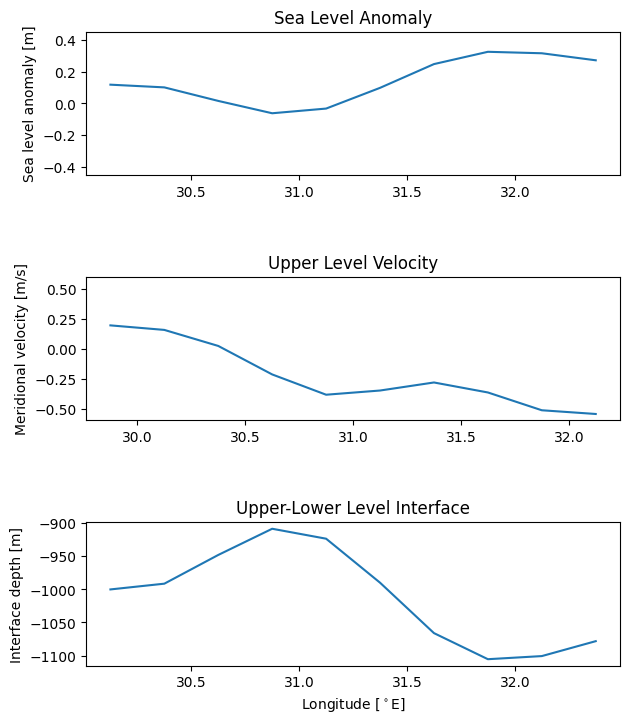

In [97]:
lat_index = 12
lon_index = range(4,14)
lon_index_clipped = range(3,13)

fig, axs = plt.subplots(3)

axs[0].plot(lon[lon_index],h[lon_index,lat_index])
axs[1].plot(lon[lon_index_clipped],v[lon_index_clipped,lat_index-1])

#ADD CODE HERE
#axs[2].plot()

eta = h[lon_index,lat_index]
rho_1 = 1024
rho_2 = 1026
delta = rho_1*eta/(rho_1-rho_2)
axs[2].plot(lon[lon_index],delta - delta[0] - 1000)

#Adding labels and adjusting other parameters of the plots
axs[0].set_title("Sea Level Anomaly")
axs[0].set_ylabel("Sea level anomaly [m]")
axs[0].set_ylim([-0.45,0.45])
axs[1].set_title("Upper Level Velocity")
axs[1].set_ylabel("Meridional velocity [m/s]")
axs[1].set_ylim([-0.6,0.6])
axs[2].set_title("Upper-Lower Level Interface")
axs[2].set_ylabel("Interface depth [m]")
axs[2].set_xlabel("Longitude [$^\circ$E]")

fig.tight_layout()
fig.set_figheight(8)